In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import string
from stop_words import get_stop_words
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from skmultilearn.problem_transform import BinaryRelevance

In [90]:
# loading the scraped data

d1=pd.read_csv('Ratings_final_df1.csv')
d2=pd.read_csv('Ratings_final_df2.csv')
d3=pd.read_csv('Ratings_final_df3.csv')
d4=pd.read_csv('Ratings_final_df4.csv')

In [91]:
df1=pd.DataFrame(d1)
df2=pd.DataFrame(d2)
df3=pd.DataFrame(d3)
df4=pd.DataFrame(d4)

In [92]:
final_df=pd.concat([df1,df2,df3,df4],ignore_index=True)
final_df

,Unnamed: 0,Review,Rating
0,0,(After using for more than a month) Not satisf...,4
1,1,Good laptop,4
2,2,It is my first laptop so i can not touch much ...,4
3,3,Even if we watch video for 720p for 30 minutes...,3
4,4,"The laptop is good at 30,000 price. finally go...",4
...,...,...,...
20387,1495,Good,3
20388,1496,Very nice products,5
20389,1497,"SOUND SYSTEM WE OBSERVE AVAREGE ,PLEASE IMPROV...",5
20390,1498,Very good quality sound and picture,5


In [93]:
final_df.to_csv('Ratings_final_data.csv')

In [94]:
df=pd.read_csv('Ratings_final_data.csv')
df

,Unnamed: 0,Unnamed: 0.1,Review,Rating
0,0,0,(After using for more than a month) Not satisf...,4
1,1,1,Good laptop,4
2,2,2,It is my first laptop so i can not touch much ...,4
3,3,3,Even if we watch video for 720p for 30 minutes...,3
4,4,4,"The laptop is good at 30,000 price. finally go...",4
...,...,...,...,...
20387,20387,1495,Good,3
20388,20388,1496,Very nice products,5
20389,20389,1497,"SOUND SYSTEM WE OBSERVE AVAREGE ,PLEASE IMPROV...",5
20390,20390,1498,Very good quality sound and picture,5


# Exploratory Data Analysison train data :

In [95]:
df.shape

(20392, 4)

The data has 20392 rows and 2 columns

In [96]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Review', 'Rating'], dtype='object')

In [97]:
df.sample(10)

,Unnamed: 0,Unnamed: 0.1,Review,Rating
18483,18483,591,I am Satisfied with Product & Services of Inst...,5
421,421,371,Wow!! amazing,4
1882,1882,532,Sound quality is poor Considering the other fe...,4
17696,17696,250,I am a professional photographer for over 10 y...,1
7376,7376,134,I had HP printer earlier. I wanted a change. P...,4
17179,17179,488,I love this camcorder! It has excellent video ...,5
1874,1874,524,Very good 🙂,5
18990,18990,98,"Good offer, save money",4
2222,2222,872,Nice phone for this range but camera is very w...,3
19102,19102,210,Smart TV Samsung next purchase I am Android sm...,4


In [98]:
df.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Review          object
Rating           int64
dtype: object

In [99]:
comment = df['Review']
print(comment.head())

0    (After using for more than a month) Not satisf...
1                                          Good laptop
2    It is my first laptop so i can not touch much ...
3    Even if we watch video for 720p for 30 minutes...
4    The laptop is good at 30,000 price. finally go...
Name: Review, dtype: object


In [100]:
label = df['Rating']
label

0        4
1        4
2        4
3        3
4        4
        ..
20387    3
20388    5
20389    5
20390    5
20391    5
Name: Rating, Length: 20392, dtype: int64

average length of comment: 125.873


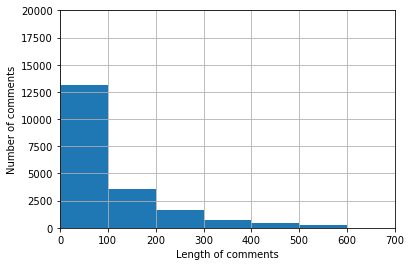

In [101]:
#checking for number of comments whose length varies from 0 to 1200 

x = [len(str(comment[i])) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,100,200,300,400,500,600]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 700, 0, 20000])
plt.grid(True)
plt.show()

In [102]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(str(comment[ix]))<=400:
        comments.append(comment[ix])
        labels.append(label[ix])

In [103]:
labels = np.asarray(labels)

In [104]:
print(len(comments))

19083


Hence, after removing comments longer than 400 characters, we are still left with more than 69000 comments

In [105]:
#Preparing a string containing all punctuations to be removed

print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [106]:
#Updating the list of stop words

stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

In [107]:
print (stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [108]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [109]:
# Stemming and Lemmatizing

#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91994\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [111]:
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab)
    l = []
    for word in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)

AttributeError: 'float' object has no attribute 'lower'